In [42]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [13]:
train=pd.read_csv('D:/data science/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


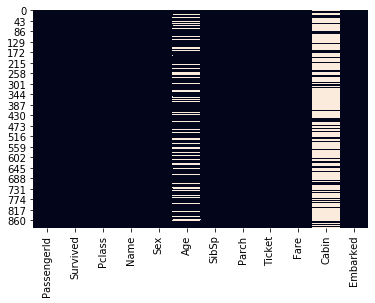

In [15]:
sns.heatmap(train.isnull(),cbar=False,)

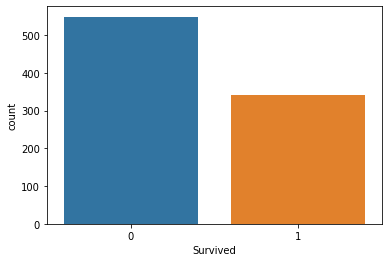

In [16]:
sns.countplot(x='Survived',data=train)

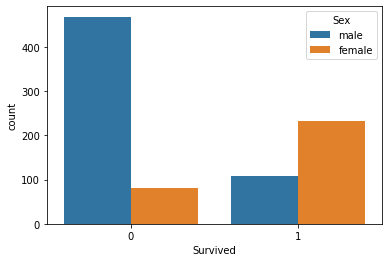

In [17]:
sns.countplot(x='Survived',hue='Sex',data=train)

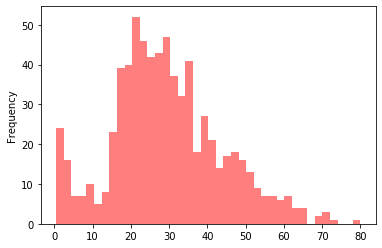

In [23]:
train['Age'].plot.hist(bins=40,color='r',alpha=0.5)

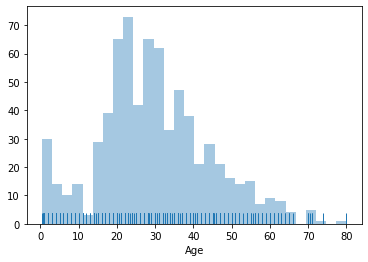

In [33]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30,rug=True)

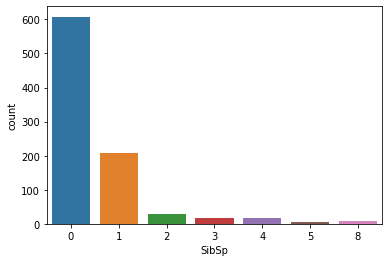

In [35]:
sns.countplot(x='SibSp',data=train)

In [36]:
import cufflinks as cf
cf.go_online()

In [1]:
#train['Fare'].iplot(kind='hist',bins=50)

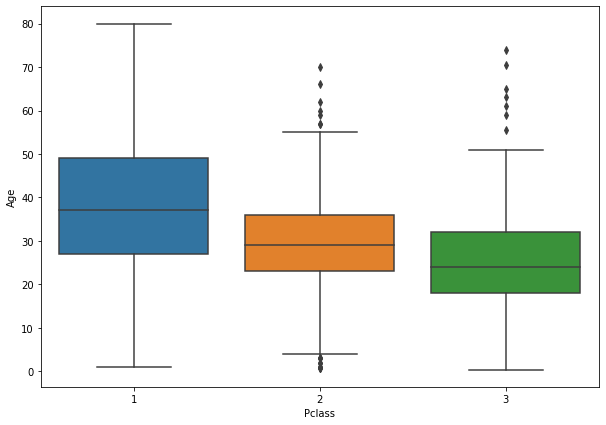

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)


In [75]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 25
    else:
       return Age

In [76]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

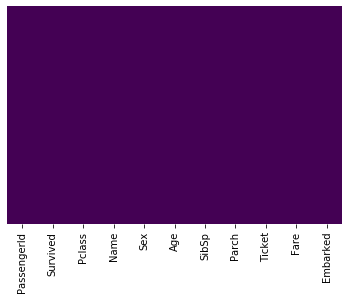

In [81]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
train.drop('Cabin',axis=1,inplace=True)

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,S


In [85]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [88]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [100]:
train=pd.concat([train,sex,embark],axis=1)

In [102]:
train.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [103]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,25.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,25.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,25.0,0,0,8.0500,1,0,1


In [104]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=101)

In [107]:
from sklearn.linear_model import LogisticRegression

In [110]:
logicreg= LogisticRegression(max_iter=1000)

In [111]:
logicreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
prediction=logicreg.predict(x_test)

In [113]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [117]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.78      0.64      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [120]:
from sklearn.metrics import accuracy_score

In [121]:
print(accuracy_score(y_test,prediction))

0.7686567164179104


In [122]:
from sklearn.metrics import explained_variance_score

In [123]:
print(explained_variance_score(y_test,prediction))

0.07632718159033924
